In [1]:
from indra.sources import trips

tp = trips.process_text("MEK1 phosphorylates ERK2")
stmts = tp.statements

/home/jesseliu/miniconda3/envs/dynh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO: [2025-04-06 01:02:38] protmapper.resources - Could not access 'hgnc' resource file, will download.
INFO: [2025-04-06 01:02:38] protmapper.resources - Downloading 'hgnc' resource file into /home/jesseliu/.data/protmapper/0.0.29/hgnc_entries.tsv.gz from cache.
INFO: [2025-04-06 01:03:59] protmapper.resources - Could not access 'up' resource file, will download.
INFO: [2025-04-06 01:03:59] protmapper.resources - Downloading 'up' resource file into /home/jesseliu/.data/protmapper/0.0.29/uniprot_entries.tsv.gz from cache.
INFO: [2025-04-06 01:04:09] protmapper.resources - Could not access 'upsec' resource file, will download.
INFO: [2025-04-06 01:04:09] protmapper.resources - Downloading 'upsec' resource file into /home

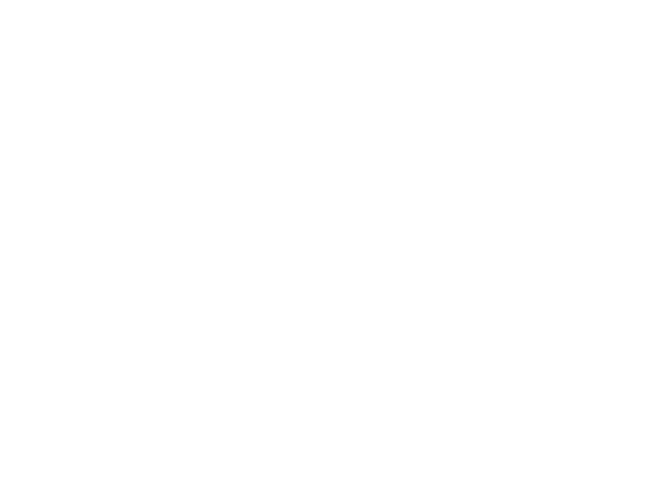

In [10]:
from indra.sources import trips
from indra.tools import assemble_corpus
import networkx as nx
import matplotlib.pyplot as plt

prompt = "Here's a step-by-step logical explanation:\n\n1.  **Premise 1:** Nonpapillary renal cell carcinoma is associated with FLT1 (presumably, FLT1 plays a role in its development or progression).\n2.  **Premise 2:** Axitinib targets FLT1 (meaning it inhibits or blocks the activity of FLT1).\n3.  **Inference:** Targeting FLT1 with Axitinib *could* potentially disrupt the growth or progression of nonpapillary renal cell carcinoma, given the association in Premise 1.\n4.  **Conclusion:** Therefore, nonpapillary renal cell carcinoma is an indication for Axitinib (meaning Axitinib *may* be a suitable treatment option).\n\n**In essence:** The logic is that if a cancer is linked to a specific protein (FLT1) and a drug targets that protein, the cancer *might* be susceptible to the drug's effects, making the cancer a potential target for the drug.\n"
tp = trips.process_text(prompt)
stmts = tp.statements
G = nx.DiGraph()

for stmt in stmts:
    subj = stmt.agent_list()[0].name
    obj = stmt.agent_list()[1].name
    rel = stmt.__class__.__name__
    G.add_edge(subj, obj, label=rel)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = ChatOpenAI(temperature=0, model_name="gpt-4")
template = """
Extract medical and biology related subject-relation-object triples from the following text:

"{context}"

Return the result as a list of triples, like: [(subject, relation, object)]
"""

prompt = PromptTemplate(input_variables=["context"], template=template)
chain = LLMChain(llm=llm, prompt=prompt)

text = """
Given the association between nonpapillary renal cell carcinoma and FLT1, and the fact that Axitinib targets FLT1, nonpapillary renal cell carcinoma is an indication for Axitinib.", "reasoning": "Here's a step-by-step logical explanation:\n\n1.  **Premise 1:** Nonpapillary renal cell carcinoma is associated with FLT1 (presumably, FLT1 plays a role in its development or progression).\n2.  **Premise 2:** Axitinib targets FLT1 (meaning it inhibits or blocks the activity of FLT1).\n3.  **Inference:** Targeting FLT1 with Axitinib *could* potentially disrupt the growth or progression of nonpapillary renal cell carcinoma, given the association in Premise 1.\n4.  **Conclusion:** Therefore, nonpapillary renal cell carcinoma is an indication for Axitinib (meaning Axitinib *may* be a suitable treatment option).\n\n**In essence:** The logic is that if a cancer is linked to a specific protein (FLT1) and a drug targets that protein, the cancer *might* be susceptible to the drug's effects, making the cancer a potential target for the drug.\n
"""

result = chain.run(context=text)
print(result)

INFO: [2025-04-06 02:23:17] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[("nonpapillary renal cell carcinoma", "is associated with", "FLT1"), 
("Axitinib", "targets", "FLT1"), 
("nonpapillary renal cell carcinoma", "is an indication for", "Axitinib")]


In [14]:
import networkx as nx
from pyvis.network import Network
import ast

triples = ast.literal_eval(result)

G = nx.DiGraph()
for subj, rel, obj in triples:
    G.add_edge(subj, obj, label=rel)

net = Network(notebook=True)
net.from_nx(G)
net.show("graph.html")


graph.html
